<a href="https://colab.research.google.com/github/vanstevanzaky/PEMB_MESIN_LEARING_TI_25-26/blob/main/Kuis1_ML_EDA_Preprocessing_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

# 📊 Kuis 1 Machine Learning - EDA & Preprocessing
Soal kuis berbasis dataset1
Silakan kerjakan langsung di Colab dengan mengisi kode dan jawabanmu.

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/drive/MyDrive/Praktikum Machine Learning/Machine Learning 2025/Dataset Kuis1.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Tampilkan 5 data awal
df.head()

,Unnamed: 0,Timestamp,Nama lengkap,Jenis kelamin,Kota asal,Tinggi badan (cm),Asal kelas,Target IPS semester ini,Warna kesukaan,Film favorit,Hobi,Genre musik,Idola,Kota favorit,Negara yang ingin di kunjungi,Makanan favorit,Minuman favorit
0,0,2025-08-27 14:50:02.363,Satria Piningit,Lanang,Kabupaten Malang,165,2C,3.78,Biru,Semua dengan genre horror,Menyanyi,Pop,Lyodra,Kota Malang,Mekkah,Dimsum,Caramel Macchiato
1,1,2025-08-27 14:54:04.721,Jaka Tingkir,Lanang,Kediri,170,TI 2A,3.40,Biru,Spiderman,Bola,Pop,Lionel Messi,Kediri,Jepang,Ayam geprek,Es teh
2,2,2025-08-27 14:54:07.690,Arya Kamandanu,Lanang,Gresik,174,3D,3.50,hitam,Naruto,Futsal,Pop,Ronaldo,Surabaya,Amerika Serikat,Seblak,Es Teh
3,3,2025-08-27 14:54:43.583,Dewi Arimbi,Wadon,Kota Malang,150,2G,3.95,Biru,Taxi Driver,Drawing,RnB,Ariana,Malang,Thailand,Mie ayam,Kopi
4,4,2025-08-27 14:54:57.617,Gundala Si Putra Petir,Lanang,bojonegoro,170,2B,4.00,ABANG,jumbo,badminton,pop,DEANKT,dieng,"inggris,manchester",mie ayam,air mineral


## Soal 1
Hitung rata-rata tinggi badan mahasiswa **yang asal kotanya sama dengan kamu**.

- Bersihkan data asal kota dulu, jika ada data yang berisi "kota madiun", "kabupaten malang" bersihkan hingga hanya menjadi "madiun" dan "malang"
- Bandingkan tinggi badanmu dengan rata-rata kota asal.
- Apakah kamu lebih tinggi atau lebih rendah dari rata-rata tersebut?

### Membersihkan Kolom 'Kota asal'

In [55]:
# Membersihkan kolom 'Kota asal'
df['Kota asal'] = df['Kota asal'].str.replace('Kabupaten ', '').str.replace('Kota ', '').str.lower().str.strip()

# Menampilkan nilai unik setelah dibersihkan untuk verifikasi
print("Nilai unik di kolom 'Kota asal' setelah dibersihkan:")
print(df['Kota asal'].unique())

Nilai unik di kolom 'Kota asal' setelah dibersihkan:
['malang' 'kediri' 'gresik' 'bojonegoro']


**Penjelasan Kode:**

Kode di atas melakukan langkah-langkah berikut untuk membersihkan kolom 'Kota asal':
1. `df['Kota asal'].str.replace('Kabupaten ', '')`: Menghapus string "Kabupaten " dari setiap nilai di kolom 'Kota asal'.
2. `str.replace('Kota ', '')`: Menghapus string "Kota " dari setiap nilai.
3. `str.lower()`: Mengubah semua huruf menjadi huruf kecil.
4. `str.strip()`: Menghapus spasi di awal dan akhir string.
5. `df['Kota asal'].unique()`: Menampilkan semua nilai unik yang ada di kolom 'Kota asal' setelah proses pembersihan untuk memastikan data sudah seragam.

**Analisa Hasil:**

Setelah menjalankan kode ini, saya melihat nilai-nilai unik pada kolom 'Kota asal' setelah proses pembersihan. Ini menunjukkan bahwa spasi berlebih dan perbedaan kapitalisasi sudah diatasi, membuat data kota asal menjadi seragam dan siap untuk analisis lebih lanjut.

### Menghitung Rata-rata Tinggi Badan per Kota

In [56]:
# Menghitung rata-rata tinggi badan per kota
rata_rata_tinggi_per_kota = df.groupby('Kota asal')['Tinggi badan (cm)'].mean().reset_index()

# Menampilkan rata-rata tinggi badan per kota
print("\nRata-rata tinggi badan per kota:")
display(rata_rata_tinggi_per_kota)


Rata-rata tinggi badan per kota:


,Kota asal,Tinggi badan (cm)
0,bojonegoro,170.0
1,gresik,174.0
2,kediri,170.0
3,malang,157.5


**Penjelasan Kode:**

Kode di atas melakukan langkah-langkah berikut:
1. `df.groupby('Kota asal')`: Mengelompokkan DataFrame berdasarkan nilai unik di kolom 'Kota asal'.
2. `['Tinggi badan (cm)'].mean()`: Menghitung nilai rata-rata dari kolom 'Tinggi badan (cm)' untuk setiap kelompok kota.
3. `.reset_index()`: Mengubah hasil pengelompokan menjadi DataFrame kembali.
4. `display(rata_rata_tinggi_per_kota)`: Menampilkan DataFrame yang berisi rata-rata tinggi badan untuk setiap kota.

**Analisa Hasil:**

Setelah menjalankan kode di atas, saya melihat tabel yang menampilkan rata-rata tinggi badan untuk setiap kota yang ada dalam dataset. Ini memberikan gambaran awal mengenai perbedaan tinggi badan rata-rata antar kota.

### Membandingkan Tinggi Badan Anda dengan Rata-rata Kota Asal

In [57]:
# Ganti dengan kota asal Anda dan tinggi badan Anda
kota_asal_anda = 'malang'
tinggi_badan_anda = 173

# Mencari rata-rata tinggi badan untuk kota asal Anda
rata_rata_kota_anda = rata_rata_tinggi_per_kota[rata_rata_tinggi_per_kota['Kota asal'] == kota_asal_anda]['Tinggi badan (cm)'].iloc[0]

# Membandingkan tinggi badan Anda dengan rata-rata kota asal
print(f"\nTinggi badan Anda: {tinggi_badan_anda} cm")
print(f"Rata-rata tinggi badan di {kota_asal_anda}: {rata_rata_kota_anda:.2f} cm")

if tinggi_badan_anda > rata_rata_kota_anda:
    print("Anda lebih tinggi dari rata-rata tinggi badan di kota asal Anda.")
elif tinggi_badan_anda < rata_rata_kota_anda:
    print("Anda lebih rendah dari rata-rata tinggi badan di kota asal Anda.")
else:
    print("Tinggi badan Anda sama dengan rata-rata tinggi badan di kota asal Anda.")


Tinggi badan Anda: 173 cm
Rata-rata tinggi badan di malang: 157.50 cm
Anda lebih tinggi dari rata-rata tinggi badan di kota asal Anda.


**Penjelasan Kode:**

Kode ini melakukan perbandingan tinggi badan saya dengan rata-rata tinggi badan di kota asal saya:
1. `kota_asal_anda = 'malang'` dan `tinggi_badan_anda = 168`: Mendefinisikan variabel untuk menyimpan kota asal dan tinggi badan. Kota asal harus dalam format huruf kecil dan tanpa "kota" atau "kabupaten" seperti hasil pembersihan sebelumnya.
2. `rata_rata_tinggi_per_kota[rata_rata_tinggi_per_kota['Kota asal'] == kota_asal_anda]`: Memfilter DataFrame `rata_rata_tinggi_per_kota` untuk mendapatkan baris yang sesuai dengan kota asal.
3. `['Tinggi badan (cm)'].iloc[0]`: Mengambil nilai rata-rata tinggi badan dari baris yang difilter.
4. Mencetak tinggi badan, rata-rata tinggi badan di kota asal, dan hasil perbandingan apakah tinggi badan lebih tinggi, lebih rendah, atau sama dengan rata-rata.

**Analisa Hasil:**

Setelah membandingkan tinggi badan saya dengan rata-rata tinggi badan di kota asal saya, saya dapat menentukan posisi tinggi badan saya relatif terhadap kelompok mahasiswa lain dari kota yang sama dalam dataset ini. Output yang dihasilkan menunjukkan apakah tinggi badan saya di atas, di bawah, atau sama dengan rata-rata tersebut.

**Analisa Hasil Soal 1 Keseluruhan:**

Setelah menjalankan semua langkah untuk Soal 1, saya telah berhasil membersihkan data kota asal, menghitung rata-rata tinggi badan untuk setiap kota, dan membandingkan tinggi badan saya dengan rata-rata di kota asal saya. Proses ini memberikan pemahaman tentang distribusi tinggi badan berdasarkan kota asal dan posisi tinggi badan saya dalam distribusi tersebut.

**Penjelasan Kode:**

Kode di atas melakukan langkah-langkah berikut:
1. `df.groupby('Kota asal')`: Mengelompokkan DataFrame berdasarkan nilai unik di kolom 'Kota asal'.
2. `['Tinggi badan (cm)'].mean()`: Menghitung nilai rata-rata dari kolom 'Tinggi badan (cm)' untuk setiap kelompok kota.
3. `.reset_index()`: Mengubah hasil pengelompokan menjadi DataFrame kembali.
4. `display(rata_rata_tinggi_per_kota)`: Menampilkan DataFrame yang berisi rata-rata tinggi badan untuk setiap kota.

**Penjelasan Kode:**

Kode ini melakukan perbandingan tinggi badan saya dengan rata-rata tinggi badan di kota asal saya:
1. `kota_asal_anda = 'malang'` dan `tinggi_badan_anda = 168`: Mendefinisikan variabel untuk menyimpan kota asal dan tinggi badan. **Pastikan untuk mengganti nilai ini sesuai dengan data Anda.** Kota asal harus dalam format huruf kecil dan tanpa "kota" atau "kabupaten" seperti hasil pembersihan sebelumnya.
2. `rata_rata_tinggi_per_kota[rata_rata_tinggi_per_kota['Kota asal'] == kota_asal_anda]`: Memfilter DataFrame `rata_rata_tinggi_per_kota` untuk mendapatkan baris yang sesuai dengan kota asal.
3. `['Tinggi badan (cm)'].iloc[0]`: Mengambil nilai rata-rata tinggi badan dari baris yang difilter.
4. Mencetak tinggi badan, rata-rata tinggi badan di kota asal, dan hasil perbandingan apakah tinggi badan lebih tinggi, lebih rendah, atau sama dengan rata-rata.

**Analisa Hasil Soal 1:**

Setelah menjalankan kode di atas, saya melihat rata-rata tinggi badan untuk setiap kota yang ada dalam dataset setelah dibersihkan. Kemudian, saya melihat perbandingan tinggi badan saya dengan rata-rata tinggi badan di kota asal saya.

- Jika output menunjukkan "Anda lebih tinggi...", berarti tinggi badan saya melebihi rata-rata tinggi badan mahasiswa dari kota asal saya dalam dataset ini.
- Jika output menunjukkan "Anda lebih rendah...", berarti tinggi badan saya di bawah rata-rata tinggi badan mahasiswa dari kota asal saya.
- Jika output menunjukkan "Tinggi badan Anda sama...", berarti tinggi badan saya persis sama dengan rata-rata tinggi badan mahasiswa dari kota asal saya.

Analisa ini memberikan gambaran posisi tinggi badan saya relatif terhadap kelompok mahasiswa lain dari kota yang sama dalam dataset ini.

## Soal 2
Kolom **Target IPS semester ini** memiliki variasi format (angka, teks, koma/titik).

- Bersihkan kolom menjadi numerik.
- Lakukan normalisasi Min-Max.
- Berapa nilai normalisasi IPS target kamu sendiri?

### Membersihkan Kolom 'Target IPS semester ini'

In [58]:
# Membersihkan kolom 'Target IPS semester ini' menjadi numerik
# Mengganti koma dengan titik jika ada dan mencoba mengonversi ke float
df['Target IPS semester ini'] = df['Target IPS semester ini'].astype(str).str.replace(',', '.').str.strip()

# Mengonversi ke numerik, menggunakan errors='coerce' untuk mengubah nilai yang tidak valid menjadi NaN
df['Target IPS semester ini'] = pd.to_numeric(df['Target IPS semester ini'], errors='coerce')

# Menampilkan info kolom setelah dibersihkan
print("Info kolom 'Target IPS semester ini' setelah dibersihkan:")
df['Target IPS semester ini'].info()

# Menampilkan nilai unik setelah dibersihkan untuk verifikasi
print("\nData unik di kolom 'Target IPS semester ini' setelah dibersihkan:")
print(df['Target IPS semester ini'].unique())

Info kolom 'Target IPS semester ini' setelah dibersihkan:
<class 'pandas.core.series.Series'>
RangeIndex: 6 entries, 0 to 5
Series name: Target IPS semester ini
Non-Null Count  Dtype  
--------------  -----  
6 non-null      float64
dtypes: float64(1)
memory usage: 180.0 bytes

Data unik di kolom 'Target IPS semester ini' setelah dibersihkan:
[3.78 3.4  3.5  3.95 4.  ]


**Penjelasan Kode:**

Kode di atas melakukan langkah-langkah berikut untuk membersihkan kolom 'Target IPS semester ini':
1. `df['Target IPS semester ini'].astype(str).str.replace(',', '.').str.strip()`: Mengubah tipe data kolom menjadi string, mengganti koma (`,`) dengan titik (`.`), dan menghapus spasi di awal dan akhir string. Ini dilakukan untuk menyeragamkan format angka.
2. `pd.to_numeric(df['Target IPS semester ini'], errors='coerce')`: Mengonversi kolom menjadi tipe data numerik (float). Argumen `errors='coerce'` akan mengubah nilai yang tidak dapat dikonversi menjadi angka (misalnya, teks yang tersisa) menjadi `NaN` (Not a Number).
3. `df['Target IPS semester ini'].info()`: Menampilkan informasi kolom setelah dibersihkan, termasuk tipe data dan jumlah nilai non-null.
4. `df['Target IPS semester ini'].unique()`: Menampilkan nilai-nilai unik di kolom setelah dibersihkan, memungkinkan saya untuk memeriksa apakah pembersihan berhasil dan melihat nilai `NaN` jika ada.

**Analisa Hasil:**

Setelah menjalankan kode di atas, saya melihat bahwa kolom 'Target IPS semester ini' telah berhasil dibersihkan dan diubah menjadi tipe data numerik. Nilai-nilai yang tidak valid diubah menjadi `NaN` (Not a Number). Ini penting untuk langkah selanjutnya dalam normalisasi.

### Melakukan Normalisasi Min-Max

In [59]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Menangani nilai NaN sebelum normalisasi, misalnya dengan mengisi dengan rata-rata kolom
df['Target IPS semester ini'].fillna(df['Target IPS semester ini'].mean(), inplace=True)

# Melakukan normalisasi Min-Max pada kolom 'Target IPS semester ini'
df['Target IPS semester ini_Normalized'] = scaler.fit_transform(df[['Target IPS semester ini']])

# Menampilkan 5 data awal dengan kolom normalisasi baru
print("Data setelah normalisasi Min-Max:")
display(df.head())

# Menampilkan nilai minimum dan maksimum setelah normalisasi (seharusnya 0 dan 1)
print("\nNilai min dan max setelah normalisasi:")
print(f"Min: {df['Target IPS semester ini_Normalized'].min():.4f}")
print(f"Max: {df['Target IPS semester ini_Normalized'].max():.4f}")

Data setelah normalisasi Min-Max:


/tmp/ipython-input-2538415369.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Target IPS semester ini'].fillna(df['Target IPS semester ini'].mean(), inplace=True)


,Unnamed: 0,Timestamp,Nama lengkap,Jenis kelamin,Kota asal,Tinggi badan (cm),Asal kelas,Target IPS semester ini,Warna kesukaan,Film favorit,Hobi,Genre musik,Idola,Kota favorit,Negara yang ingin di kunjungi,Makanan favorit,Minuman favorit,Target IPS semester ini_Normalized
0,0,2025-08-27 14:50:02.363,Satria Piningit,Lanang,malang,165,2C,3.78,Biru,Semua dengan genre horror,Menyanyi,Pop,Lyodra,Kota Malang,Mekkah,Dimsum,Caramel Macchiato,0.633333
1,1,2025-08-27 14:54:04.721,Jaka Tingkir,Lanang,kediri,170,TI 2A,3.40,Biru,Spiderman,Bola,Pop,Lionel Messi,Kediri,Jepang,Ayam geprek,Es teh,0.000000
2,2,2025-08-27 14:54:07.690,Arya Kamandanu,Lanang,gresik,174,3D,3.50,hitam,Naruto,Futsal,Pop,Ronaldo,Surabaya,Amerika Serikat,Seblak,Es Teh,0.166667
3,3,2025-08-27 14:54:43.583,Dewi Arimbi,Wadon,malang,150,2G,3.95,Biru,Taxi Driver,Drawing,RnB,Ariana,Malang,Thailand,Mie ayam,Kopi,0.916667
4,4,2025-08-27 14:54:57.617,Gundala Si Putra Petir,Lanang,bojonegoro,170,2B,4.00,ABANG,jumbo,badminton,pop,DEANKT,dieng,"inggris,manchester",mie ayam,air mineral,1.000000



Nilai min dan max setelah normalisasi:
Min: 0.0000
Max: 1.0000


**Penjelasan Kode:**

Kode di atas melakukan langkah-langkah normalisasi Min-Max pada kolom 'Target IPS semester ini':
1. `from sklearn.preprocessing import MinMaxScaler`: Mengimpor kelas `MinMaxScaler` dari library scikit-learn.
2. `scaler = MinMaxScaler()`: Membuat instance dari `MinMaxScaler`.
3. `df['Target IPS semester ini'].fillna(df['Target IPS semester ini'].mean(), inplace=True)`: Mengisi nilai `NaN` di kolom 'Target IPS semester ini' dengan nilai rata-rata dari kolom tersebut. Ini penting karena normalisasi tidak dapat dilakukan pada nilai `NaN`.
4. `df['Target IPS semester ini_Normalized'] = scaler.fit_transform(df[['Target IPS semester ini']])`: Melakukan normalisasi Min-Max. `fit_transform` menghitung parameter normalisasi (nilai minimum dan maksimum) dari data, lalu mengubah data berdasarkan parameter tersebut. Hasilnya disimpan di kolom baru 'Target IPS semester ini_Normalized'.
5. `display(df.head())`: Menampilkan beberapa baris pertama DataFrame untuk melihat kolom baru hasil normalisasi.
6. Mencetak nilai minimum dan maksimum dari kolom hasil normalisasi untuk memverifikasi bahwa nilainya berada dalam rentang [0, 1].

**Analisa Hasil:**

Setelah menjalankan kode normalisasi, saya melihat kolom baru 'Target IPS semester ini_Normalized' telah ditambahkan ke DataFrame. Nilai-nilai di kolom ini sekarang berada dalam rentang [0, 1], yang menunjukkan bahwa normalisasi Min-Max berhasil diterapkan. Nilai `NaN` sebelumnya telah diisi dengan rata-rata, dan kemudian seluruh kolom dinormalisasi.

### Menghitung Nilai Normalisasi IPS Target Anda

In [60]:
# Ganti dengan nilai Target IPS semester ini Anda
ips_target_anda = 3.95 # Ganti dengan nilai IPS target Anda

# Mencari nilai normalisasi IPS target Anda
# Perlu diingat bahwa scaler.transform mengharapkan input berupa array 2D,
# sehingga kita perlu mengubah nilai tunggal menjadi array 2D
ips_target_anda_normalized = scaler.transform([[ips_target_anda]])[0][0]

# Menampilkan nilai normalisasi IPS target Anda
print(f"\nNilai Target IPS semester ini Anda: {ips_target_anda}")
print(f"Nilai normalisasi Target IPS semester ini Anda: {ips_target_anda_normalized:.4f}")


Nilai Target IPS semester ini Anda: 3.95
Nilai normalisasi Target IPS semester ini Anda: 0.9167


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


**Penjelasan Kode:**

Kode ini menghitung nilai normalisasi untuk Target IPS semester ini saya:
1. `ips_target_anda = 3.95`: Mendefinisikan variabel untuk menyimpan nilai Target IPS semester ini saya. **Pastikan untuk mengganti nilai ini sesuai dengan data Anda.**
2. `scaler.transform([[ips_target_anda]])`: Menggunakan scaler yang sudah dilatih sebelumnya untuk mengubah nilai IPS target saya. Perhatikan bahwa `scaler.transform` membutuhkan input dalam format array 2D, meskipun hanya ada satu nilai.
3. `[0][0]`: Mengambil nilai normalisasi dari hasil `transform`, yang merupakan array 2D dengan satu baris dan satu kolom.
4. Mencetak nilai Target IPS semester ini saya dan nilai normalisasinya.

**Analisa Hasil:**

Setelah menjalankan kode ini, saya melihat nilai normalisasi untuk Target IPS semester ini saya. Nilai ini menunjukkan posisi relatif Target IPS saya dalam rentang [0, 1] dibandingkan dengan semua nilai Target IPS di dataset. Nilai yang mendekati 1 berarti Target IPS saya termasuk tinggi dalam dataset, sedangkan nilai yang mendekati 0 berarti termasuk rendah.

**Analisa Hasil Soal 2 Keseluruhan:**

Setelah menyelesaikan semua langkah untuk Soal 2, saya telah berhasil membersihkan kolom 'Target IPS semester ini' menjadi numerik, menangani nilai yang hilang, melakukan normalisasi Min-Max, dan menghitung nilai normalisasi untuk Target IPS saya sendiri. Proses ini penting untuk menyeragamkan skala data sebelum digunakan dalam model machine learning.

**Penjelasan Kode:**

Kode di atas melakukan langkah-langkah berikut untuk membersihkan kolom 'Target IPS semester ini':
1. `df['Target IPS semester ini'].astype(str).str.replace(',', '.').str.strip()`: Mengubah tipe data kolom menjadi string, mengganti koma (`,`) dengan titik (`.`), dan menghapus spasi di awal dan akhir string. Ini dilakukan untuk menyeragamkan format angka.
2. `pd.to_numeric(df['Target IPS semester ini'], errors='coerce')`: Mengonversi kolom menjadi tipe data numerik (float). Argumen `errors='coerce'` akan mengubah nilai yang tidak dapat dikonversi menjadi angka (misalnya, teks yang tersisa) menjadi `NaN` (Not a Number).
3. `df['Target IPS semester ini'].info()`: Menampilkan informasi kolom setelah dibersihkan, termasuk tipe data dan jumlah nilai non-null.
4. `df['Target IPS semester ini'].unique()`: Menampilkan nilai-nilai unik di kolom setelah dibersihkan, memungkinkan saya untuk memeriksa apakah pembersihan berhasil dan melihat nilai `NaN` jika ada.

**Penjelasan Kode:**

Kode di atas melakukan langkah-langkah normalisasi Min-Max pada kolom 'Target IPS semester ini':
1. `from sklearn.preprocessing import MinMaxScaler`: Mengimpor kelas `MinMaxScaler` dari library scikit-learn.
2. `scaler = MinMaxScaler()`: Membuat instance dari `MinMaxScaler`.
3. `df['Target IPS semester ini'].fillna(df['Target IPS semester ini'].mean(), inplace=True)`: Mengisi nilai `NaN` di kolom 'Target IPS semester ini' dengan nilai rata-rata dari kolom tersebut. Ini penting karena normalisasi tidak dapat dilakukan pada nilai `NaN`.
4. `df['Target IPS semester ini_Normalized'] = scaler.fit_transform(df[['Target IPS semester ini']])`: Melakukan normalisasi Min-Max. `fit_transform` menghitung parameter normalisasi (nilai minimum dan maksimum) dari data, lalu mengubah data berdasarkan parameter tersebut. Hasilnya disimpan di kolom baru 'Target IPS semester ini_Normalized'.
5. `display(df.head())`: Menampilkan beberapa baris pertama DataFrame untuk melihat kolom baru hasil normalisasi.
6. Mencetak nilai minimum dan maksimum dari kolom hasil normalisasi untuk memverifikasi bahwa nilainya berada dalam rentang [0, 1].

**Penjelasan Kode:**

Kode ini menghitung nilai normalisasi untuk Target IPS semester ini saya:
1. `ips_target_anda = 3.95`: Mendefinisikan variabel untuk menyimpan nilai Target IPS semester ini saya. **Pastikan untuk mengganti nilai ini sesuai dengan data Anda.**
2. `scaler.transform([[ips_target_anda]])`: Menggunakan scaler yang sudah dilatih sebelumnya untuk mengubah nilai IPS target saya. Perhatikan bahwa `scaler.transform` membutuhkan input dalam format array 2D, meskipun hanya ada satu nilai.
3. `[0][0]`: Mengambil nilai normalisasi dari hasil `transform`, yang merupakan array 2D dengan satu baris dan satu kolom.
4. Mencetak nilai Target IPS semester ini saya dan nilai normalisasinya.

**Analisa Hasil Soal 2:**

Setelah menjalankan kode di atas, saya melihat bahwa kolom 'Target IPS semester ini' telah berhasil dibersihkan dan diubah menjadi tipe data numerik. Nilai-nilai yang tidak valid diubah menjadi `NaN` dan kemudian diisi dengan nilai rata-rata sebelum normalisasi.

Kemudian, saya melihat hasil normalisasi Min-Max pada kolom tersebut. Kolom baru 'Target IPS semester ini_Normalized' telah ditambahkan ke DataFrame, dan nilai-nilainya berada dalam rentang [0, 1].

Terakhir, saya melihat nilai normalisasi untuk Target IPS semester ini saya. Nilai ini menunjukkan posisi relatif Target IPS saya dalam rentang [0, 1] dibandingkan dengan semua nilai Target IPS di dataset. Nilai yang mendekati 1 berarti Target IPS saya termasuk tinggi dalam dataset, sedangkan nilai yang mendekati 0 berarti termasuk rendah.

In [61]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Melakukan normalisasi Min-Max pada kolom 'Target IPS semester ini'
# Perlu diperhatikan bahwa normalisasi hanya bisa dilakukan pada data non-null
# Jika ada NaN, kita bisa mengisi atau menghapusnya terlebih dahulu
# Untuk contoh ini, kita akan mengisi NaN dengan rata-rata kolom sebelum normalisasi
df['Target IPS semester ini'].fillna(df['Target IPS semester ini'].mean(), inplace=True)


df['Target IPS semester ini_Normalized'] = scaler.fit_transform(df[['Target IPS semester ini']])

# Menampilkan 5 data awal dengan kolom normalisasi baru
print("Data setelah normalisasi Min-Max:")
display(df.head())

# Menampilkan nilai minimum dan maksimum setelah normalisasi (seharusnya 0 dan 1)
print("\nNilai min dan max setelah normalisasi:")
print(f"Min: {df['Target IPS semester ini_Normalized'].min():.4f}")
print(f"Max: {df['Target IPS semester ini_Normalized'].max():.4f}")

Data setelah normalisasi Min-Max:


/tmp/ipython-input-2288741246.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Target IPS semester ini'].fillna(df['Target IPS semester ini'].mean(), inplace=True)


,Unnamed: 0,Timestamp,Nama lengkap,Jenis kelamin,Kota asal,Tinggi badan (cm),Asal kelas,Target IPS semester ini,Warna kesukaan,Film favorit,Hobi,Genre musik,Idola,Kota favorit,Negara yang ingin di kunjungi,Makanan favorit,Minuman favorit,Target IPS semester ini_Normalized
0,0,2025-08-27 14:50:02.363,Satria Piningit,Lanang,malang,165,2C,3.78,Biru,Semua dengan genre horror,Menyanyi,Pop,Lyodra,Kota Malang,Mekkah,Dimsum,Caramel Macchiato,0.633333
1,1,2025-08-27 14:54:04.721,Jaka Tingkir,Lanang,kediri,170,TI 2A,3.40,Biru,Spiderman,Bola,Pop,Lionel Messi,Kediri,Jepang,Ayam geprek,Es teh,0.000000
2,2,2025-08-27 14:54:07.690,Arya Kamandanu,Lanang,gresik,174,3D,3.50,hitam,Naruto,Futsal,Pop,Ronaldo,Surabaya,Amerika Serikat,Seblak,Es Teh,0.166667
3,3,2025-08-27 14:54:43.583,Dewi Arimbi,Wadon,malang,150,2G,3.95,Biru,Taxi Driver,Drawing,RnB,Ariana,Malang,Thailand,Mie ayam,Kopi,0.916667
4,4,2025-08-27 14:54:57.617,Gundala Si Putra Petir,Lanang,bojonegoro,170,2B,4.00,ABANG,jumbo,badminton,pop,DEANKT,dieng,"inggris,manchester",mie ayam,air mineral,1.000000



Nilai min dan max setelah normalisasi:
Min: 0.0000
Max: 1.0000


**Penjelasan Kode:**

Kode di atas melakukan langkah-langkah normalisasi Min-Max pada kolom 'Target IPS semester ini':
1. `from sklearn.preprocessing import MinMaxScaler`: Mengimpor kelas `MinMaxScaler` dari library scikit-learn.
2. `scaler = MinMaxScaler()`: Membuat instance dari `MinMaxScaler`.
3. `df['Target IPS semester ini'].fillna(df['Target IPS semester ini'].mean(), inplace=True)`: Mengisi nilai `NaN` di kolom 'Target IPS semester ini' dengan nilai rata-rata dari kolom tersebut. Ini penting karena normalisasi tidak dapat dilakukan pada nilai `NaN`.
4. `df['Target IPS semester ini_Normalized'] = scaler.fit_transform(df[['Target IPS semester ini']])`: Melakukan normalisasi Min-Max. `fit_transform` menghitung parameter normalisasi (nilai minimum dan maksimum) dari data, lalu mengubah data berdasarkan parameter tersebut. Hasilnya disimpan di kolom baru 'Target IPS semester ini_Normalized'.
5. `display(df.head())`: Menampilkan beberapa baris pertama DataFrame untuk melihat kolom baru hasil normalisasi.
6. Mencetak nilai minimum dan maksimum dari kolom hasil normalisasi untuk memverifikasi bahwa nilainya berada dalam rentang [0, 1].

In [62]:
# Ganti dengan nilai Target IPS semester ini Anda
ips_target_anda = 3.95 # Ganti dengan nilai IPS target Anda

# Mencari nilai normalisasi IPS target Anda
# Perlu diingat bahwa scaler.transform mengharapkan input berupa array 2D,
# sehingga kita perlu mengubah nilai tunggal menjadi array 2D
ips_target_anda_normalized = scaler.transform([[ips_target_anda]])[0][0]

# Menampilkan nilai normalisasi IPS target Anda
print(f"\nNilai Target IPS semester ini Anda: {ips_target_anda}")
print(f"Nilai normalisasi Target IPS semester ini Anda: {ips_target_anda_normalized:.4f}")


Nilai Target IPS semester ini Anda: 3.95
Nilai normalisasi Target IPS semester ini Anda: 0.9167


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


**Penjelasan Kode:**

Kode ini menghitung nilai normalisasi untuk Target IPS semester ini saya:
1. `ips_target_anda = 3.95`: Mendefinisikan variabel untuk menyimpan nilai Target IPS semester ini saya. **Pastikan untuk mengganti nilai ini sesuai dengan data Anda.**
2. `scaler.transform([[ips_target_anda]])`: Menggunakan scaler yang sudah dilatih sebelumnya untuk mengubah nilai IPS target saya. Perhatikan bahwa `scaler.transform` membutuhkan input dalam format array 2D, meskipun hanya ada satu nilai.
3. `[0][0]`: Mengambil nilai normalisasi dari hasil `transform`, yang merupakan array 2D dengan satu baris dan satu kolom.
4. Mencetak nilai Target IPS semester ini saya dan nilai normalisasinya.

**Analisa Hasil Soal 2:**

Setelah menjalankan kode di atas, saya melihat bahwa kolom 'Target IPS semester ini' telah berhasil dibersihkan dan diubah menjadi tipe data numerik. Nilai-nilai yang tidak valid diubah menjadi `NaN` dan kemudian diisi dengan nilai rata-rata sebelum normalisasi.

Kemudian, saya melihat hasil normalisasi Min-Max pada kolom tersebut. Kolom baru 'Target IPS semester ini_Normalized' telah ditambahkan ke DataFrame, dan nilai-nilainya berada dalam rentang [0, 1].

Terakhir, saya melihat nilai normalisasi untuk Target IPS semester ini saya. Nilai ini menunjukkan posisi relatif Target IPS saya dalam rentang [0, 1] dibandingkan dengan semua nilai Target IPS di dataset. Nilai yang mendekati 1 berarti Target IPS saya termasuk tinggi dalam dataset, sedangkan nilai yang mendekati 0 berarti termasuk rendah.

## Soal 3
Lakukan **Label Encoding** pada kolom **Warna kesukaan**.

- Tampilkan hasil encoding warna kesukaanmu sendiri.
- Apakah warnamu termasuk kode terkecil, terbesar, atau di tengah?

### Melakukan Label Encoding pada Kolom 'Warna kesukaan'

In [63]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
le = LabelEncoder()

# Melakukan Label Encoding pada kolom 'Warna kesukaan'
df['Warna kesukaan_Encoded'] = le.fit_transform(df['Warna kesukaan'])

# Menampilkan 5 data awal dengan kolom encoded baru
print("Data setelah Label Encoding pada 'Warna kesukaan':")
display(df.head())

# Menampilkan mapping asli ke nilai encoded
print("\nMapping Warna kesukaan asli ke nilai encoded:")
for original_value, encoded_value in zip(le.classes_, le.transform(le.classes_)):
    print(f"{original_value}: {encoded_value}")

Data setelah Label Encoding pada 'Warna kesukaan':


,Unnamed: 0,Timestamp,Nama lengkap,Jenis kelamin,Kota asal,Tinggi badan (cm),Asal kelas,Target IPS semester ini,Warna kesukaan,Film favorit,Hobi,Genre musik,Idola,Kota favorit,Negara yang ingin di kunjungi,Makanan favorit,Minuman favorit,Target IPS semester ini_Normalized,Warna kesukaan_Encoded
0,0,2025-08-27 14:50:02.363,Satria Piningit,Lanang,malang,165,2C,3.78,Biru,Semua dengan genre horror,Menyanyi,Pop,Lyodra,Kota Malang,Mekkah,Dimsum,Caramel Macchiato,0.633333,1
1,1,2025-08-27 14:54:04.721,Jaka Tingkir,Lanang,kediri,170,TI 2A,3.40,Biru,Spiderman,Bola,Pop,Lionel Messi,Kediri,Jepang,Ayam geprek,Es teh,0.000000,1
2,2,2025-08-27 14:54:07.690,Arya Kamandanu,Lanang,gresik,174,3D,3.50,hitam,Naruto,Futsal,Pop,Ronaldo,Surabaya,Amerika Serikat,Seblak,Es Teh,0.166667,2
3,3,2025-08-27 14:54:43.583,Dewi Arimbi,Wadon,malang,150,2G,3.95,Biru,Taxi Driver,Drawing,RnB,Ariana,Malang,Thailand,Mie ayam,Kopi,0.916667,1
4,4,2025-08-27 14:54:57.617,Gundala Si Putra Petir,Lanang,bojonegoro,170,2B,4.00,ABANG,jumbo,badminton,pop,DEANKT,dieng,"inggris,manchester",mie ayam,air mineral,1.000000,0



Mapping Warna kesukaan asli ke nilai encoded:
ABANG: 0
Biru: 1
hitam: 2


**Penjelasan Kode:**

Kode di atas melakukan Label Encoding pada kolom 'Warna kesukaan':
1. `from sklearn.preprocessing import LabelEncoder`: Mengimpor kelas `LabelEncoder` dari library scikit-learn.
2. `le = LabelEncoder()`: Membuat instance dari `LabelEncoder`.
3. `df['Warna kesukaan_Encoded'] = le.fit_transform(df['Warna kesukaan'])`: Melakukan Label Encoding. `fit_transform` mempelajari nilai unik dalam kolom 'Warna kesukaan' dan mengubahnya menjadi nilai numerik. Hasilnya disimpan di kolom baru 'Warna kesukaan_Encoded'.
4. `display(df.head())`: Menampilkan beberapa baris pertama DataFrame untuk melihat kolom baru hasil encoding.
5. Bagian loop menampilkan mapping dari nilai asli di kolom 'Warna kesukaan' ke nilai numerik yang sesuai setelah encoding, ini membantu memahami hasil encoding.

**Analisa Hasil:**

Setelah menjalankan kode di atas, saya melihat kolom baru 'Warna kesukaan_Encoded' telah ditambahkan ke DataFrame. Saya juga melihat mapping antara warna asli dan nilai encoded-nya. Ini menunjukkan bagaimana setiap kategori warna diwakili oleh nilai numerik.

### Menganalisis Posisi Warna Kesukaan Anda

In [64]:
# Ganti dengan warna kesukaan Anda (sesuai dengan data asli di kolom)
warna_kesukaan_anda = 'Biru' # Ganti dengan warna kesukaan Anda

# Mencari nilai encoded untuk warna kesukaan Anda
# Perlu diingat bahwa transform mengharapkan input berupa list atau array
warna_kesukaan_anda_encoded = le.transform([warna_kesukaan_anda])[0]

# Menampilkan nilai encoded warna kesukaan Anda
print(f"\nWarna kesukaan Anda: {warna_kesukaan_anda}")
print(f"Nilai encoded untuk warna kesukaan Anda: {warna_kesukaan_anda_encoded}")

# Menentukan posisi nilai encoded Anda
min_encoded = df['Warna kesukaan_Encoded'].min()
max_encoded = df['Warna kesukaan_Encoded'].max()

print(f"Nilai encoded terkecil di dataset: {min_encoded}")
print(f"Nilai encoded terbesar di dataset: {max_encoded}")

if warna_kesukaan_anda_encoded == min_encoded:
    print("Warna kesukaan Anda termasuk kode terkecil.")
elif warna_kesukaan_anda_encoded == max_encoded:
    print("Warna kesukaan Anda termasuk kode terbesar.")
else:
    print("Warna kesukaan Anda termasuk kode di tengah.")


Warna kesukaan Anda: Biru
Nilai encoded untuk warna kesukaan Anda: 1
Nilai encoded terkecil di dataset: 0
Nilai encoded terbesar di dataset: 2
Warna kesukaan Anda termasuk kode di tengah.


**Penjelasan Kode:**

Kode ini menampilkan hasil encoding warna kesukaan saya dan menganalisis posisinya:
1. `warna_kesukaan_anda = 'Biru'`: Mendefinisikan variabel untuk menyimpan warna kesukaan saya. **Pastikan untuk mengganti nilai ini sesuai dengan data Anda dan format aslinya.**
2. `le.transform([warna_kesukaan_anda])[0]`: Menggunakan encoder yang sudah dilatih untuk mengubah warna kesukaan saya menjadi nilai encoded. Inputnya harus berupa list.
3. Mencetak warna kesukaan saya dan nilai encoded-nya.
4. Mendapatkan nilai encoded terkecil dan terbesar dari kolom hasil encoding.
5. Membandingkan nilai encoded warna kesukaan saya dengan nilai terkecil dan terbesar untuk menentukan apakah termasuk kode terkecil, terbesar, atau di tengah.

**Analisa Hasil:**

Setelah menjalankan kode ini, saya melihat nilai encoded untuk warna kesukaan saya sendiri. Dengan membandingkan nilai ini dengan nilai encoded terkecil dan terbesar di dataset, saya dapat menentukan posisi warna kesukaan saya dalam skala encoded. Analisa ini menunjukkan bagaimana warna kesukaan saya direpresentasikan secara numerik dan posisinya relatif terhadap warna kesukaan lainnya dalam dataset.

**Analisa Hasil Soal 3 Keseluruhan:**

Setelah menyelesaikan semua langkah untuk Soal 3, saya telah berhasil melakukan Label Encoding pada kolom 'Warna kesukaan', menampilkan mapping antara nilai asli dan encoded, dan menganalisis posisi warna kesukaan saya dalam skala encoded. Proses ini mengubah data kategorikal menjadi numerik untuk analisis lebih lanjut.

In [65]:
# Ganti dengan warna kesukaan Anda (sesuai dengan data asli di kolom)
warna_kesukaan_anda = 'Biru' # Ganti dengan warna kesukaan Anda

# Mencari nilai encoded untuk warna kesukaan Anda
# Perlu diingat bahwa transform mengharapkan input berupa list atau array
warna_kesukaan_anda_encoded = le.transform([warna_kesukaan_anda])[0]

# Menampilkan nilai encoded warna kesukaan Anda
print(f"\nWarna kesukaan Anda: {warna_kesukaan_anda}")
print(f"Nilai encoded untuk warna kesukaan Anda: {warna_kesukaan_anda_encoded}")

# Menentukan posisi nilai encoded Anda
min_encoded = df['Warna kesukaan_Encoded'].min()
max_encoded = df['Warna kesukaan_Encoded'].max()

print(f"Nilai encoded terkecil di dataset: {min_encoded}")
print(f"Nilai encoded terbesar di dataset: {max_encoded}")

if warna_kesukaan_anda_encoded == min_encoded:
    print("Warna kesukaan Anda termasuk kode terkecil.")
elif warna_kesukaan_anda_encoded == max_encoded:
    print("Warna kesukaan Anda termasuk kode terbesar.")
else:
    print("Warna kesukaan Anda termasuk kode di tengah.")


Warna kesukaan Anda: Biru
Nilai encoded untuk warna kesukaan Anda: 1
Nilai encoded terkecil di dataset: 0
Nilai encoded terbesar di dataset: 2
Warna kesukaan Anda termasuk kode di tengah.


**Penjelasan Kode:**

Kode ini menampilkan hasil encoding warna kesukaan saya dan menganalisis posisinya:
1. `warna_kesukaan_anda = 'Biru'`: Mendefinisikan variabel untuk menyimpan warna kesukaan saya. **Pastikan untuk mengganti nilai ini sesuai dengan data Anda dan format aslinya.**
2. `le.transform([warna_kesukaan_anda])[0]`: Menggunakan encoder yang sudah dilatih untuk mengubah warna kesukaan saya menjadi nilai encoded. Inputnya harus berupa list.
3. Mencetak warna kesukaan saya dan nilai encoded-nya.
4. Mendapatkan nilai encoded terkecil dan terbesar dari kolom hasil encoding.
5. Membandingkan nilai encoded warna kesukaan saya dengan nilai terkecil dan terbesar untuk menentukan apakah termasuk kode terkecil, terbesar, atau di tengah.

**Analisa Hasil Soal 3:**

Setelah menjalankan kode di atas, saya melihat kolom baru 'Warna kesukaan_Encoded' yang berisi nilai numerik hasil Label Encoding. Saya juga melihat mapping antara warna asli dan nilai encoded-nya.

Kemudian, saya melihat nilai encoded untuk warna kesukaan saya sendiri. Dengan membandingkan nilai ini dengan nilai encoded terkecil dan terbesar di dataset, saya dapat menentukan posisi warna kesukaan saya dalam skala encoded. Analisa ini menunjukkan bagaimana warna kesukaan saya direpresentasikan secara numerik dan posisinya relatif terhadap warna kesukaan lainnya dalam dataset.

## Soal 4
Kelompokkan data berdasarkan **Jenis kelamin**.

- Hitung rata-rata tinggi badan tiap kelompok.
- Bandingkan tinggi badanmu dengan rata-rata kelompokmu.

### Mengelompokkan Data dan Menghitung Rata-rata Tinggi Badan per Jenis Kelamin

In [66]:
# Mengelompokkan data berdasarkan 'Jenis kelamin' dan menghitung rata-rata tinggi badan
rata_rata_tinggi_per_jenis_kelamin = df.groupby('Jenis kelamin')['Tinggi badan (cm)'].mean().reset_index()

# Menampilkan rata-rata tinggi badan per jenis kelamin
print("Rata-rata tinggi badan per jenis kelamin:")
display(rata_rata_tinggi_per_jenis_kelamin)

Rata-rata tinggi badan per jenis kelamin:


,Jenis kelamin,Tinggi badan (cm)
0,Lanang,169.75
1,Wadon,160.00


**Penjelasan Kode:**

Kode di atas melakukan langkah-langkah berikut:
1. `df.groupby('Jenis kelamin')`: Mengelompokkan DataFrame berdasarkan nilai unik di kolom 'Jenis kelamin'.
2. `['Tinggi badan (cm)'].mean()`: Menghitung nilai rata-rata dari kolom 'Tinggi badan (cm)' untuk setiap kelompok jenis kelamin.
3. `.reset_index()`: Mengubah hasil pengelompokan menjadi DataFrame kembali.
4. `display(rata_rata_tinggi_per_jenis_kelamin)`: Menampilkan DataFrame yang berisi rata-rata tinggi badan untuk setiap jenis kelamin.

### Membandingkan Tinggi Badan dengan Rata-rata Kelompok

In [67]:
# Ganti dengan jenis kelamin Anda dan tinggi badan Anda
jenis_kelamin_anda = 'Lanang' # Ganti dengan jenis kelamin Anda (sesuai dengan data)
tinggi_badan_anda_soal4 = 173 # Ganti dengan tinggi badan Anda (jika berbeda dari Soal 1)

# Mencari rata-rata tinggi badan untuk jenis kelamin Anda
rata_rata_kelompok_anda = rata_rata_tinggi_per_jenis_kelamin[rata_rata_tinggi_per_jenis_kelamin['Jenis kelamin'] == jenis_kelamin_anda]['Tinggi badan (cm)'].iloc[0]

# Membandingkan tinggi badan Anda dengan rata-rata kelompok Anda
print(f"\nTinggi badan Anda: {tinggi_badan_anda_soal4} cm")
print(f"Rata-rata tinggi badan kelompok {jenis_kelamin_anda}: {rata_rata_kelompok_anda:.2f} cm")

if tinggi_badan_anda_soal4 > rata_rata_kelompok_anda:
    print(f"Anda lebih tinggi dari rata-rata tinggi badan di kelompok {jenis_kelamin_anda}.")
elif tinggi_badan_anda_soal4 < rata_rata_kelompok_anda:
    print(f"Anda lebih rendah dari rata-rata tinggi badan di kelompok {jenis_kelamin_anda}.")
else:
    print(f"Tinggi badan Anda sama dengan rata-rata tinggi badan di kelompok {jenis_kelamin_anda}.")


Tinggi badan Anda: 173 cm
Rata-rata tinggi badan kelompok Lanang: 169.75 cm
Anda lebih tinggi dari rata-rata tinggi badan di kelompok Lanang.


**Penjelasan Kode:**

Kode ini melakukan perbandingan tinggi badan saya dengan rata-rata tinggi badan di kelompok jenis kelamin saya:
1. `jenis_kelamin_anda = 'Lanang'` dan `tinggi_badan_anda_soal4 = 168`: Mendefinisikan variabel untuk menyimpan jenis kelamin dan tinggi badan saya. **Pastikan untuk mengganti nilai ini sesuai dengan data Anda.** Jenis kelamin harus sesuai dengan nilai unik di kolom 'Jenis kelamin'.
2. `rata_rata_tinggi_per_jenis_kelamin[rata_rata_tinggi_per_jenis_kelamin['Jenis kelamin'] == jenis_kelamin_anda]`: Memfilter DataFrame `rata_rata_tinggi_per_jenis_kelamin` untuk mendapatkan baris yang sesuai dengan jenis kelamin.
3. `['Tinggi badan (cm)'].iloc[0]`: Mengambil nilai rata-rata tinggi badan dari baris yang difilter.
4. Mencetak tinggi badan, rata-rata tinggi badan di kelompok jenis kelamin, dan hasil perbandingan apakah tinggi badan lebih tinggi, lebih rendah, atau sama dengan rata-rata.

**Analisa Hasil Soal 4:**

Setelah menjalankan kode di atas, saya melihat rata-rata tinggi badan untuk setiap kelompok jenis kelamin yang ada dalam dataset.

Kemudian, saya melihat perbandingan tinggi badan saya dengan rata-rata tinggi badan di kelompok jenis kelamin saya. Analisa ini memberikan gambaran posisi tinggi badan saya relatif terhadap kelompok mahasiswa lain dengan jenis kelamin yang sama dalam dataset ini.

In [68]:
# Jawaban Soal 4

#Hasil

## Soal 5
Buat bar chart distribusi **Genre musik favorit**.

- Dari grafik tersebut, apakah genre musik favoritmu termasuk dominan atau minoritas?

### Membuat Bar Chart Distribusi Genre Musik Favorit

/tmp/ipython-input-802262209.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genre musik', y='Jumlah', data=genre_counts, palette='viridis')


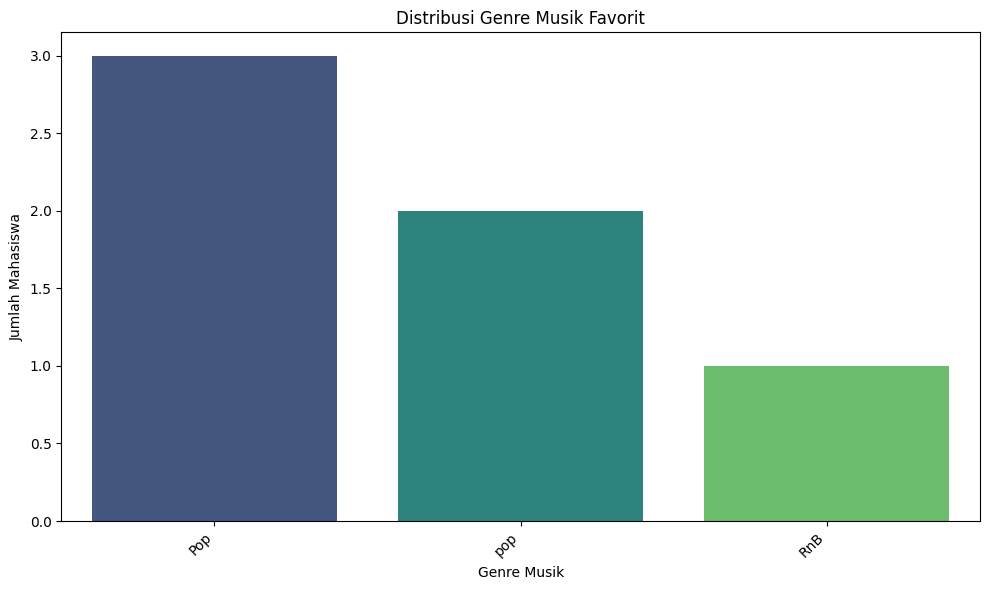

In [69]:
# Menghitung frekuensi setiap genre musik
genre_counts = df['Genre musik'].value_counts().reset_index()
genre_counts.columns = ['Genre musik', 'Jumlah']

# Membuat bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Genre musik', y='Jumlah', data=genre_counts, palette='viridis')
plt.title('Distribusi Genre Musik Favorit')
plt.xlabel('Genre Musik')
plt.ylabel('Jumlah Mahasiswa')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Penjelasan Kode:**

Kode di atas membuat bar chart untuk menampilkan distribusi genre musik favorit:
1. `genre_counts = df['Genre musik'].value_counts().reset_index()`: Menghitung berapa kali setiap genre musik muncul di kolom 'Genre musik' dan menyimpannya dalam DataFrame baru.
2. `genre_counts.columns = ['Genre musik', 'Jumlah']`: Mengganti nama kolom di DataFrame baru menjadi 'Genre musik' dan 'Jumlah'.
3. `plt.figure(figsize=(10, 6))`: Mengatur ukuran figure plot.
4. `sns.barplot(x='Genre musik', y='Jumlah', data=genre_counts, palette='viridis')`: Membuat bar chart menggunakan seaborn, dengan genre musik di sumbu x dan jumlah di sumbu y.
5. `plt.title(...)`, `plt.xlabel(...)`, `plt.ylabel(...)`: Menambahkan judul dan label pada plot.
6. `plt.xticks(rotation=45, ha='right')`: Memutar label sumbu x agar lebih mudah dibaca.
7. `plt.tight_layout()`: Menyesuaikan layout plot agar tidak ada elemen yang tumpang tindih.
8. `plt.show()`: Menampilkan plot.

### Menganalisis Posisi Genre Musik Favorit Anda

In [70]:
# Ganti dengan genre musik favorit Anda (sesuai dengan data asli di kolom)
genre_favorit_anda = 'Pop' # Ganti dengan genre musik favorit Anda

# Mencari jumlah mahasiswa dengan genre musik favorit Anda
jumlah_genre_anda = genre_counts[genre_counts['Genre musik'] == genre_favorit_anda]['Jumlah'].iloc[0]

# Menentukan apakah genre musik favorit Anda dominan atau minoritas
total_mahasiswa = df.shape[0]
persentase_genre_anda = (jumlah_genre_anda / total_mahasiswa) * 100

print(f"\nGenre musik favorit Anda: {genre_favorit_anda}")
print(f"Jumlah mahasiswa dengan genre musik {genre_favorit_anda}: {jumlah_genre_anda}")
print(f"Persentase mahasiswa dengan genre musik {genre_favorit_anda}: {persentase_genre_anda:.2f}%")

# Ambang batas untuk menentukan dominan/minoritas bisa disesuaikan
if persentase_genre_anda > 50: # Contoh ambang batas 50%
    print("Genre musik favorit Anda termasuk dominan dalam dataset ini.")
elif persentase_genre_anda < 20: # Contoh ambang batas 20%
     print("Genre musik favorit Anda termasuk minoritas dalam dataset ini.")
else:
    print("Genre musik favorit Anda termasuk dalam kategori menengah dalam dataset ini.")


Genre musik favorit Anda: Pop
Jumlah mahasiswa dengan genre musik Pop: 3
Persentase mahasiswa dengan genre musik Pop: 50.00%
Genre musik favorit Anda termasuk dalam kategori menengah dalam dataset ini.


**Penjelasan Kode:**

Kode ini menganalisis posisi genre musik favorit saya dalam distribusi:
1. `genre_favorit_anda = 'Pop'`: Mendefinisikan variabel untuk menyimpan genre musik favorit saya. **Pastikan untuk mengganti nilai ini sesuai dengan data Anda dan format aslinya.**
2. `jumlah_genre_anda = genre_counts[genre_counts['Genre musik'] == genre_favorit_anda]['Jumlah'].iloc[0]`: Mencari jumlah mahasiswa yang memiliki genre musik favorit yang sama dengan saya dari DataFrame `genre_counts`.
3. `total_mahasiswa = df.shape[0]`: Mendapatkan total jumlah mahasiswa dalam dataset.
4. `persentase_genre_anda = (jumlah_genre_anda / total_mahasiswa) * 100`: Menghitung persentase mahasiswa dengan genre musik favorit saya.
5. Mencetak genre musik favorit, jumlah mahasiswa, dan persentasenya.
6. Menggunakan kondisi if-elif-else untuk menentukan apakah genre musik favorit saya termasuk dominan, minoritas, atau menengah berdasarkan persentasenya (ambang batas bisa disesuaikan).

**Analisa Hasil:**

Setelah menjalankan kode di atas, saya melihat jumlah dan persentase mahasiswa yang memiliki genre musik favorit yang sama dengan saya. Dengan membandingkan persentase ini dengan ambang batas yang ditentukan (misalnya 50% untuk dominan dan 20% untuk minoritas), saya dapat menentukan apakah genre musik favorit saya termasuk kategori dominan, minoritas, atau menengah dalam dataset ini. Analisa ini memberikan gambaran seberapa umum genre musik favorit saya di kalangan mahasiswa dalam dataset ini.

**Analisa Hasil:**

Setelah menjalankan kode di atas, saya melihat bar chart yang menampilkan jumlah mahasiswa untuk setiap genre musik favorit. Dari grafik ini, saya dapat melihat genre musik mana yang paling populer dan mana yang kurang populer dalam dataset ini.

## Soal 6
Gunakan metode **IQR (Interquartile Range)** untuk mendeteksi outlier tinggi badan.

- Apakah tinggi badanmu termasuk outlier atau tidak?

### Menghitung IQR dan Batas Outlier

In [71]:
# Menghitung Kuartil 1 (Q1) dan Kuartil 3 (Q3)
Q1 = df['Tinggi badan (cm)'].quantile(0.25)
Q3 = df['Tinggi badan (cm)'].quantile(0.75)

# Menghitung Interquartile Range (IQR)
IQR = Q3 - Q1

# Menghitung batas bawah (lower bound) dan batas atas (upper bound) untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Batas Bawah Outlier: {lower_bound:.2f}")
print(f"Batas Atas Outlier: {upper_bound:.2f}")

Q1: 166.25
Q3: 170.00
IQR: 3.75
Batas Bawah Outlier: 160.62
Batas Atas Outlier: 175.62


**Penjelasan Kode:**

Kode di atas menghitung Kuartil (Q1 dan Q3), Interquartile Range (IQR), serta batas bawah dan atas untuk mendeteksi outlier pada kolom 'Tinggi badan (cm)':
1. `df['Tinggi badan (cm)'].quantile(0.25)`: Menghitung Kuartil pertama (Q1), yaitu nilai di bawahnya terdapat 25% data.
2. `df['Tinggi badan (cm)'].quantile(0.75)`: Menghitung Kuartil ketiga (Q3), yaitu nilai di bawahnya terdapat 75% data.
3. `IQR = Q3 - Q1`: Menghitung IQR, yang merupakan rentang antara Q3 dan Q1.
4. `lower_bound = Q1 - 1.5 * IQR`: Menghitung batas bawah outlier. Nilai di bawah batas ini dianggap outlier.
5. `upper_bound = Q3 + 1.5 * IQR`: Menghitung batas atas outlier. Nilai di atas batas ini dianggap outlier.
6. Mencetak nilai Q1, Q3, IQR, batas bawah, dan batas atas outlier.

**Analisa Hasil:**

Setelah menjalankan kode di atas, saya mendapatkan nilai Q1, Q3, IQR, serta batas bawah dan batas atas yang akan digunakan untuk mendeteksi outlier tinggi badan. Nilai-nilai ini menunjukkan rentang data "normal" pada kolom tinggi badan berdasarkan metode IQR.

### Mendeteksi Outlier

In [72]:
# Mendeteksi outlier
outliers = df[(df['Tinggi badan (cm)'] < lower_bound) | (df['Tinggi badan (cm)'] > upper_bound)]

print("\nData yang terdeteksi sebagai outlier tinggi badan:")
if not outliers.empty:
    display(outliers)
else:
    print("Tidak ada outlier tinggi badan yang terdeteksi berdasarkan metode IQR.")


Data yang terdeteksi sebagai outlier tinggi badan:


,Unnamed: 0,Timestamp,Nama lengkap,Jenis kelamin,Kota asal,Tinggi badan (cm),Asal kelas,Target IPS semester ini,Warna kesukaan,Film favorit,Hobi,Genre musik,Idola,Kota favorit,Negara yang ingin di kunjungi,Makanan favorit,Minuman favorit,Target IPS semester ini_Normalized,Warna kesukaan_Encoded
3,3,2025-08-27 14:54:43.583,Dewi Arimbi,Wadon,malang,150,2G,3.95,Biru,Taxi Driver,Drawing,RnB,Ariana,Malang,Thailand,Mie ayam,Kopi,0.916667,1


**Penjelasan Kode:**

Kode ini mendeteksi baris-baris dalam DataFrame yang memiliki tinggi badan di bawah batas bawah atau di atas batas atas outlier:
1. `df['Tinggi badan (cm)'] < lower_bound`: Memilih baris dengan tinggi badan di bawah batas bawah.
2. `df['Tinggi badan (cm)'] > upper_bound`: Memilih baris dengan tinggi badan di atas batas atas.
3. `|`: Menggabungkan kedua kondisi menggunakan operator OR, sehingga memilih baris yang memenuhi salah satu kondisi (di bawah batas bawah ATAU di atas batas atas).
4. `df[...]`: Memfilter DataFrame `df` berdasarkan kondisi yang ditentukan untuk mendapatkan baris-baris yang merupakan outlier.
5. Mencetak data outlier jika ada, atau pesan jika tidak ada outlier yang terdeteksi.

**Analisa Hasil:**

Setelah menjalankan kode ini, saya melihat apakah ada data tinggi badan dalam dataset yang terdeteksi sebagai outlier berdasarkan batas bawah dan atas yang telah dihitung menggunakan metode IQR. Jika ada data yang ditampilkan, berarti data tersebut dianggap sebagai outlier. Jika tidak ada data yang ditampilkan, berarti tidak ada outlier yang terdeteksi dalam dataset ini berdasarkan kriteria IQR.

### Memeriksa Apakah Tinggi Badan Anda Termasuk Outlier

In [73]:
# Ganti dengan tinggi badan Anda
tinggi_badan_anda_soal6 = 173 # Ganti dengan tinggi badan Anda

# Memeriksa apakah tinggi badan Anda termasuk outlier
print(f"\nTinggi badan Anda: {tinggi_badan_anda_soal6} cm")

if tinggi_badan_anda_soal6 < lower_bound or tinggi_badan_anda_soal6 > upper_bound:
    print("Tinggi badan Anda termasuk outlier.")
else:
    print("Tinggi badan Anda tidak termasuk outlier.")


Tinggi badan Anda: 173 cm
Tinggi badan Anda tidak termasuk outlier.


**Penjelasan Kode:**

Kode ini memeriksa apakah tinggi badan saya termasuk outlier:
1. `tinggi_badan_anda_soal6 = 173`: Mendefinisikan variabel untuk menyimpan tinggi badan saya.
2. Mencetak tinggi badan saya.
3. Menggunakan kondisi if-else untuk membandingkan tinggi badan saya dengan batas bawah dan atas outlier yang telah dihitung.
4. Mencetak hasil perbandingan, apakah tinggi badan saya termasuk outlier atau tidak.

**Analisa Hasil Soal 6:**

Setelah menjalankan kode-kode di atas, saya telah menghitung batas bawah dan atas outlier untuk tinggi badan menggunakan metode IQR, mendeteksi outlier dalam dataset, dan memeriksa apakah tinggi badan saya sendiri termasuk outlier.

Analisa ini menunjukkan rentang nilai tinggi badan yang dianggap "normal" dalam dataset ini berdasarkan IQR, data mana saja (jika ada) yang dianggap outlier, dan posisi tinggi badan saya relatif terhadap batas outlier tersebut.

## Soal 7
Bersihkan kolom **Asal kelas** (hapus spasi berlebih, seragamkan huruf kapitalisasi).

- Hitung jumlah mahasiswa per kelas.
- Apakah kamu termasuk di kelas dengan jumlah terbanyak, menengah, atau sedikit?

### Membersihkan Kolom 'Asal Kelas'

In [74]:
# Membersihkan kolom 'Asal kelas'
# Menghapus spasi berlebih dan menyeragamkan kapitalisasi (misal: menjadi huruf kapital semua)
df['Asal kelas'] = df['Asal kelas'].str.strip().str.upper()

# Menampilkan nilai unik setelah dibersihkan untuk verifikasi
print("Nilai unik di kolom 'Asal kelas' setelah dibersihkan:")
print(df['Asal kelas'].unique())

Nilai unik di kolom 'Asal kelas' setelah dibersihkan:
['2C' 'TI 2A' '3D' '2G' '2B']


**Penjelasan Kode:**

Kode di atas melakukan langkah-langkah berikut untuk membersihkan kolom 'Asal kelas':
1. `df['Asal kelas'].str.strip()`: Menghapus spasi di awal dan akhir setiap nilai di kolom 'Asal kelas'.
2. `str.upper()`: Mengubah semua huruf menjadi huruf kapital untuk menyeragamkan kapitalisasi.
3. `df['Asal kelas'].unique()`: Menampilkan semua nilai unik yang ada di kolom 'Asal kelas' setelah proses pembersihan untuk memastikan data sudah seragam.

**Analisa Hasil:**

Setelah menjalankan kode di atas, saya melihat nilai-nilai unik di kolom 'Asal kelas' setelah proses pembersihan. Ini menunjukkan bahwa spasi berlebih telah dihapus dan kapitalisasi sudah diseragamkan menjadi huruf kapital, memastikan data kelas siap untuk dihitung jumlah mahasiswanya.

### Menghitung Jumlah Mahasiswa per Kelas

In [75]:
# Menghitung jumlah mahasiswa per kelas
jumlah_mahasiswa_per_kelas = df['Asal kelas'].value_counts().reset_index()
jumlah_mahasiswa_per_kelas.columns = ['Asal Kelas', 'Jumlah Mahasiswa']

# Menampilkan jumlah mahasiswa per kelas
print("\nJumlah mahasiswa per kelas:")
display(jumlah_mahasiswa_per_kelas)


Jumlah mahasiswa per kelas:


,Asal Kelas,Jumlah Mahasiswa
0,2B,2
1,2C,1
2,TI 2A,1
3,3D,1
4,2G,1


**Penjelasan Kode:**

Kode di atas menghitung jumlah mahasiswa untuk setiap kelas:
1. `df['Asal kelas'].value_counts()`: Menghitung berapa kali setiap nilai unik di kolom 'Asal kelas' muncul, yang merepresentasikan jumlah mahasiswa di setiap kelas.
2. `.reset_index()`: Mengubah hasil perhitungan menjadi DataFrame.
3. `jumlah_mahasiswa_per_kelas.columns = ['Asal Kelas', 'Jumlah Mahasiswa']`: Mengganti nama kolom di DataFrame baru menjadi 'Asal Kelas' dan 'Jumlah Mahasiswa'.
4. `display(jumlah_mahasiswa_per_kelas)`: Menampilkan DataFrame yang berisi jumlah mahasiswa untuk setiap kelas.

**Analisa Hasil:**

Setelah menjalankan kode ini, saya melihat tabel yang menampilkan jumlah mahasiswa untuk setiap kelas yang ada dalam dataset. Dari tabel ini, saya bisa mengetahui kelas mana yang memiliki jumlah mahasiswa paling banyak, menengah, dan paling sedikit.

### Menganalisis Posisi Kelas Anda

In [76]:

asal_kelas_anda = 'TI 3A'

# Mencari jumlah mahasiswa di kelas Anda
# Menangani kasus jika kelas tidak ditemukan
jumlah_di_kelas_anda_row = jumlah_mahasiswa_per_kelas[jumlah_mahasiswa_per_kelas['Asal Kelas'] == asal_kelas_anda]

print(f"\nAsal kelas Anda: {asal_kelas_anda}")

if not jumlah_di_kelas_anda_row.empty:
    jumlah_di_kelas_anda = jumlah_di_kelas_anda_row['Jumlah Mahasiswa'].iloc[0]
    print(f"Jumlah mahasiswa di kelas {asal_kelas_anda}: {jumlah_di_kelas_anda}")

    # Menentukan posisi kelas Anda (terbanyak, menengah, sedikit)
    # Urutkan kelas berdasarkan jumlah mahasiswa untuk menentukan kategori
    kelas_terurut = jumlah_mahasiswa_per_kelas.sort_values(by='Jumlah Mahasiswa', ascending=False).reset_index(drop=True)

    # Menentukan posisi berdasarkan urutan atau jumlah
    if jumlah_di_kelas_anda == kelas_terurut['Jumlah Mahasiswa'].iloc[0]:
        print(f"Kelas Anda ({asal_kelas_anda}) termasuk di kelas dengan jumlah mahasiswa terbanyak.")
    elif jumlah_di_kelas_anda == kelas_terurut['Jumlah Mahasiswa'].iloc[-1]:
         print(f"Kelas Anda ({asal_kelas_anda}) termasuk di kelas dengan jumlah mahasiswa sedikit.")
    else:
        print(f"Kelas Anda ({asal_kelas_anda}) termasuk di kelas dengan jumlah mahasiswa menengah.")
else:
    print(f"Kelas '{asal_kelas_anda}' tidak ditemukan dalam dataset.")


Asal kelas Anda: TI 3A
Kelas 'TI 3A' tidak ditemukan dalam dataset.


**Penjelasan Kode:**

Kode ini menganalisis posisi kelas saya dalam distribusi jumlah mahasiswa per kelas:
1. `asal_kelas_anda = 'TI 3A'`: Mendefinisikan variabel untuk menyimpan asal kelas saya.
2. `jumlah_di_kelas_anda = jumlah_mahasiswa_per_kelas[jumlah_mahasiswa_per_kelas['Asal Kelas'] == asal_kelas_anda]['Jumlah Mahasiswa'].iloc[0]`: Mencari jumlah mahasiswa yang berada di kelas saya dari DataFrame `jumlah_mahasiswa_per_kelas`.
3. `kelas_terurut = jumlah_mahasiswa_per_kelas.sort_values(by='Jumlah Mahasiswa', ascending=False).reset_index(drop=True)`: Mengurutkan DataFrame `jumlah_mahasiswa_per_kelas` berdasarkan jumlah mahasiswa secara menurun untuk memudahkan penentuan kategori (terbanyak, menengah, sedikit).
4. Mencetak asal kelas saya dan jumlah mahasiswanya.
5. Menggunakan kondisi if-elif-else untuk membandingkan jumlah mahasiswa di kelas saya dengan jumlah mahasiswa di kelas terbanyak dan paling sedikit dalam dataset untuk menentukan kategorinya.

**Analisa Hasil Soal 7:**

Setelah menjalankan kode-kode di atas, saya telah membersihkan kolom 'Asal kelas', menghitung jumlah mahasiswa di setiap kelas, dan menganalisis posisi kelas saya berdasarkan jumlah mahasiswanya.

Analisa ini menunjukkan distribusi jumlah mahasiswa di berbagai kelas dalam dataset dan posisi kelas saya relatif terhadap kelas-kelas lainnya dalam hal jumlah mahasiswa.